In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

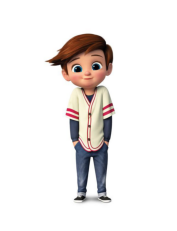

In [64]:
im=cv2.imread(r"C:\Users\Shreya\Documents\ML Projects\Img Segmentation\img2.jpg")
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(im)
plt.show()

In [65]:
print(im.shape)

(753, 564, 3)


In [66]:
#Flatten each channel of the image
all_pixel=im.reshape((-1,3))
all_pixel.shape

(424692, 3)

In [67]:
from sklearn.cluster import KMeans

In [68]:
kms=KMeans(n_clusters=4)
kms.fit(all_pixel)

KMeans(n_clusters=4)

In [69]:
# label=kms.labels_

In [70]:
centers=kms.cluster_centers_
centers

array([[254.42499683, 254.22553058, 253.30997635],
       [ 54.57706518,  36.32801168,  34.37535921],
       [209.91193607, 171.56241299, 148.0253158 ],
       [114.22724632,  83.89213788,  90.49002711]])

In [71]:
centers=np.array(centers,dtype='uint8')
centers

array([[254, 254, 253],
       [ 54,  36,  34],
       [209, 171, 148],
       [114,  83,  90]], dtype=uint8)

# PLOTING DOMINANT COLOR

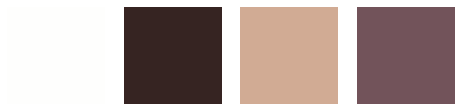

In [72]:
i=1
plt.figure(figsize=(8,4))
colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [73]:
print(colors)

[array([254, 254, 253], dtype=uint8), array([54, 36, 34], dtype=uint8), array([209, 171, 148], dtype=uint8), array([114,  83,  90], dtype=uint8)]


In [74]:
new_img=np.zeros((753*564,3),dtype='uint8')
print(new_img.shape)

(424692, 3)


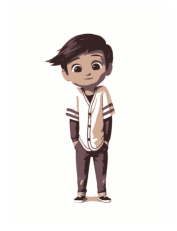

In [75]:
elephant=[]
for i in range(new_img.shape[0]):
    new_img[i]=colors[kms.labels_[i]]
# print(new_img.shape)
new_img=new_img.reshape(im.shape)
plt.imshow(new_img)
plt.axis("off")
plt.show()
